In [34]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
def Database_gen(folder):
    database = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            database.append(img_rgb)
            labels.append(filename)
    return database,labels

In [197]:
database, labels  = Database_gen('./Data')
print("Total Images : {}".format(len(labels)))

Total Images : 436


In [198]:
imageDB = pd.DataFrame()
imageDB['image_matrix'] = database

(<matplotlib.image.AxesImage at 0x7f09901e9a50>,
 Text(0.5,1,u'Golgi_gia(9).png'))

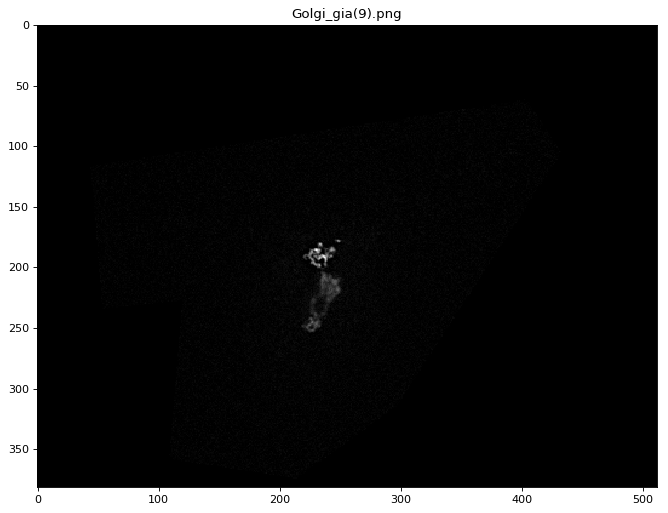

In [199]:
fig=plt.figure(figsize=(10, 12), dpi= 80, edgecolor='k')
plt.imshow(imageDB['image_matrix'][0],'gray'),plt.title(labels[0])

In [200]:
def conti(img):
    imag = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(imag, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((20,20),np.uint8)
    closing = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
    _, contours,_ = cv2.findContours(closing, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    return contours[0]

In [201]:
imageDB['contour'] = imageDB['image_matrix'].apply(conti)

In [202]:
imageDB['Labels'] = labels
imageDB.head()


,image_matrix,contour,Labels
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[247, 179]], [[247, 180]], [[246, 181]], [[2...",Golgi_gia(9).png
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[234, 327]], [[235, 327]]]",Endosome(10).png
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[226, 185]], [[225, 186]], [[224, 186]], [[2...",Nucleolus(16).png
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[246, 205]], [[245, 206]], [[245, 207]], [[2...",Nucleolus(53).png
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[233, 0]], [[233, 1]], [[233, 2]], [[233, 3]...",Golgi_gia(33).png


In [203]:
def Cbir(DB_image_contour):
    return cv2.matchShapes(DB_image_contour,contour_query,1,0.0)

In [205]:
querys, query_labels  = Database_gen('./query')
print("Total Images : {}".format(len(query_labels)))

Total Images : 5


In [206]:
queryDB = pd.DataFrame()
queryDB['image_matrix'] = querys

In [207]:
queryDB['contour'] = queryDB['image_matrix'].apply(conti)

In [208]:
queryDB['Labels'] = query_labels
queryDB.head()

,image_matrix,contour,Labels
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[120, 334]], [[121, 334]], [[122, 334]], [[1...",Microtubules(29).png
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[323, 57]], [[323, 58]], [[323, 59]], [[323,...",Endosome(1).png
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[194, 196]], [[193, 197]], [[192, 197]], [[1...",Nucleolus(26).png
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[280, 210]], [[281, 211]], [[281, 210]]]",Golgi_gia(5).png
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[243, 142]], [[242, 143]], [[241, 143]], [[2...",Nucleus(19).png


In [209]:
for i in range(len(query_labels)):
    contour_query = queryDB['contour'][i]
    imageDB['similarity'] = imageDB['contour'].apply(Cbir)
    print queryDB['Labels'][i]
    print imageDB.nsmallest(10, 'similarity')['Labels']

Microtubules(29).png
20     Microtubules(29).png
283    Microtubules(32).png
44     Microtubules(88).png
313       Nucleolus(37).png
266    Microtubules(40).png
105        Endosome(88).png
129    Microtubules(90).png
304         Endosome(2).png
379        Endosome(55).png
42          Nucleus(41).png
Name: Labels, dtype: object
Endosome(1).png
41          Endosome(1).png
39         Endosome(52).png
308        Endosome(15).png
169       Golgi_gia(55).png
198        Endosome(78).png
239       Golgi_gia(87).png
284    Microtubules(19).png
168        Endosome(58).png
68         Endosome(79).png
122       Golgi_gia(18).png
Name: Labels, dtype: object
Nucleolus(26).png
77     Nucleolus(26).png
180    Nucleolus(69).png
34     Nucleolus(30).png
410    Nucleolus(24).png
59     Nucleolus(46).png
9      Nucleolus(19).png
71      Golgi_gia(8).png
415    Nucleolus(51).png
308     Endosome(15).png
373    Nucleolus(60).png
Name: Labels, dtype: object
Golgi_gia(5).png
208        Golgi_gia(5).png
149   